In [11]:
from time import sleep
import numpy as np
import urllib3
import matplotlib
from numpy import append
import config
import vectorbt as vbt
import pandas as pd
import pandas_ta as ta
from datetime import datetime
from alpaca_trade_api.rest import REST
import gym
import gym_anytrading
from tensorflow.keras.models import load_model

from stable_baselines import ACKTR
from stable_baselines.common.evaluation import evaluate_policy

,Close
Date,
2022-05-27 00:00:00+00:00,3.656000
2022-05-30 00:00:00+00:00,3.658000
2022-05-31 00:00:00+00:00,3.597282
2022-06-01 00:00:00+00:00,3.707500
2022-06-02 00:00:00+00:00,3.725000
2022-06-03 00:00:00+00:00,3.702500
2022-06-06 00:00:00+00:00,3.638815
2022-06-07 00:00:00+00:00,3.730000
2022-06-08 00:00:00+00:00,3.752000


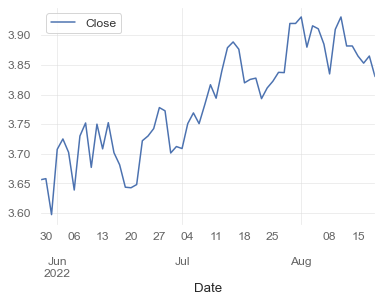

In [12]:
data = vbt.YFData.download(symbols= 'PEN=X', period="60d")
X=data.data['PEN=X'].index
Y=data.data['PEN=X'].Close
data.data['PEN=X'].reset_index().plot(x='Date', y='Close')
X=data.data['PEN=X']
solDF = pd.DataFrame(X['Close'])
solDF

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
testingSet = pd.DataFrame(solDF)
testing_set_scaled = sc.fit_transform(testingSet)
testing_set_scaled

array([[0.17595082],
       [0.18194418],
       [0.        ],
       [0.33027295],
       [0.38271219],
       [0.31529061],
       [0.12445534],
       [0.39769525],
       [0.46361938],
       [0.23892935],
       [0.45762602],
       [0.33269987],
       [0.46511754],
       [0.31320805],
       [0.25197344],
       [0.13869181],
       [0.13589624],
       [0.15206881],
       [0.37372251],
       [0.39769525],
       [0.43515216],
       [0.54152953],
       [0.52504831],
       [0.31175132],
       [0.34432652],
       [0.33424947],
       [0.46017011],
       [0.51441972],
       [0.46017011],
       [0.55621537],
       [0.65716307],
       [0.58891632],
       [0.72596064],
       [0.84430902],
       [0.87356426],
       [0.83664389],
       [0.66664071],
       [0.68393994],
       [0.69050557],
       [0.58662085],
       [0.64073901],
       [0.67462948],
       [0.71976081],
       [0.71833123],
       [0.96703829],
       [0.96703829],
       [1.        ],
       [0.847

In [14]:
inputs = solDF[0:].values     #lstm input shape edit
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = np.array(inputs)
X_test = np.reshape(X_test, (int(X_test.size/60), 60,1))

C:\Users\90507\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [15]:
sol_model = load_model('Sol_BOT.bot')

In [16]:
predicted_close_value = np.array([])
#predicted_close_value = sol_model.predict(X_test)
for i in range(0,7):
    predicted_close_value = sol_model.predict(X_test)
    X_test = np.append(X_test,predicted_close_value)
    X_test = X_test[1:]
    X_test = np.reshape(X_test, (1,60,1))

In [17]:
predicted_close_value = sc.inverse_transform(X_test[0][-7:])

In [18]:
predicted_close_value = pd.DataFrame(predicted_close_value)
predicted_close_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7 non-null      float64
dtypes: float64(1)
memory usage: 184.0 bytes


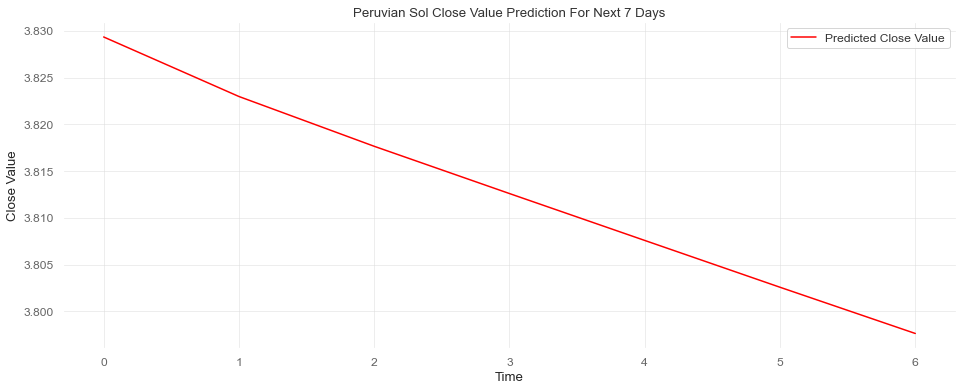

In [19]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_figwidth(16)
figure.set_figheight(6)
plt.plot(predicted_close_value, color='red', label='Predicted Close Value')
plt.title('Peruvian Sol Close Value Prediction For Next 7 Days')
plt.xlabel('Time')
plt.ylabel('Close Value')
plt.legend()
plt.show()

In [20]:
current_value_SOL = solDF["Close"][-1]
next_week_SOL = np.array([])
for i in range(predicted_close_value.size):
    next_week_SOL = np.append(next_week_SOL, 100 * (predicted_close_value[0][i]-current_value_SOL) / current_value_SOL)
    current_value_SOL = predicted_close_value[0][i]
print(next_week_SOL)
%store next_week_SOL

[-0.02719107 -0.16640095 -0.13940814 -0.13251362 -0.13165018 -0.13159909
 -0.13011638]
Stored 'next_week_SOL' (ndarray)
